# Objective:
The goal of this project is to build and train a deep learning model to classify movie reviews from the IMDb dataset as positive or negative. This task involves text processing, feature extraction, and using a neural network to make predictions.

# Key Steps:
1. Data Loading and Exploration: Understand the dataset and the distribution of data.
2. Data Preprocessing: Clean the text data and convert it into numerical features using TF-IDF vectorization.
3. Model Building: Design a feedforward neural network using TensorFlow/Keras for binary classification.
4. Model Training and Evaluation: Train the model, monitor its performance, and evaluate it on unseen test data.
5. Visualization and Reporting: Visualize the results and provide insights into the performance and challenges.

# Data loading and exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
# first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


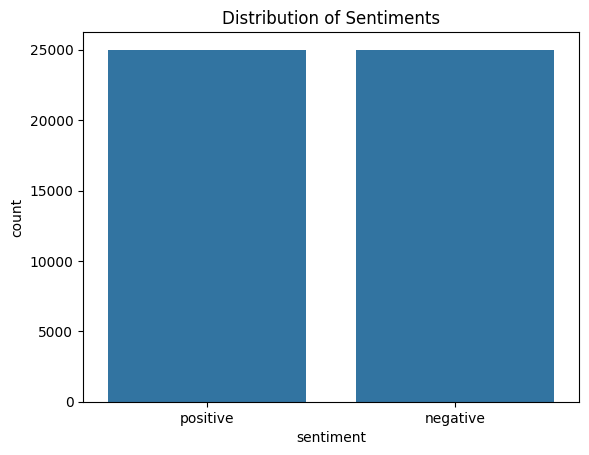

In [31]:
# Checking sentiments distribution
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

The dataset appears balanced and without bias

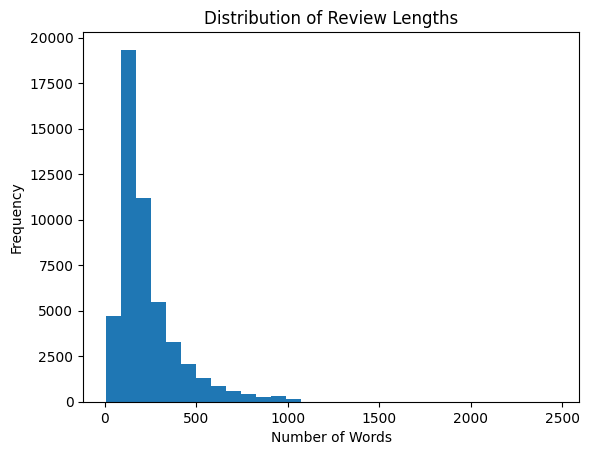

In [8]:
# Checking review lengths distribution for anomaly detection.

df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.hist(df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Data Pre-processing

This will include:
1. Converting text to lowercase
2. Removing HTML tags and URLs
3. Tokenizing text and removing stopwords
4. Applying TF-IDF vectorization

In [11]:
# key libraries
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kingoriwangui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#  defining the text cleaning function

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<.*?>', '', text)  # for removing HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # for removing URLs
    text = re.sub(r'[^a-z\s]', '', text)  # for removing special characters
    text = ' '.join([word for word in text.split() if word not in stop_words]) # for removing stopwords
    return text

In [15]:
# Initiate cleaning
df['cleaned_review'] = df['review'].apply(clean_text)

In [17]:
# TF-IDF Vectorization for converting text to numerical features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()

In [19]:
# Encoding target labels (positive=1, negative=0)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [21]:
# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (35000, 5000)
Testing Data Shape: (15000, 5000)


# Model creation

In [23]:
# key libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
# Defining the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  #Input layer
    Dropout(0.5),  #overfitting prevention
    Dense(256, activation='relu'),  #Hidden layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/Users/kingoriwangui/jimmygmc_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,692,097 (10.27 MB)

 Trainable params: 2,692,097 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [27]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,# for monitoring performance
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8068 - loss: 0.4122 - val_accuracy: 0.8763 - val_loss: 0.2827
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9199 - loss: 0.2078 - val_accuracy: 0.8793 - val_loss: 0.3003
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9534 - loss: 0.1308 - val_accuracy: 0.8729 - val_loss: 0.3403
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9847 - loss: 0.0532 - val_accuracy: 0.8691 - val_loss: 0.4599
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9955 - loss: 0.0187 - val_accuracy: 0.8734 - val_loss: 0.5775
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9979 - loss: 0.0086 - val_accuracy: 0.8684 - val_loss: 0.6959
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.8690 - val_loss: 0.7519
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9983 - loss: 0.0044 - val_accuracy: 0.

# Model evaluation

In [28]:
# Evaluate on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.8599
Test Accuracy: 0.8705


# visualization

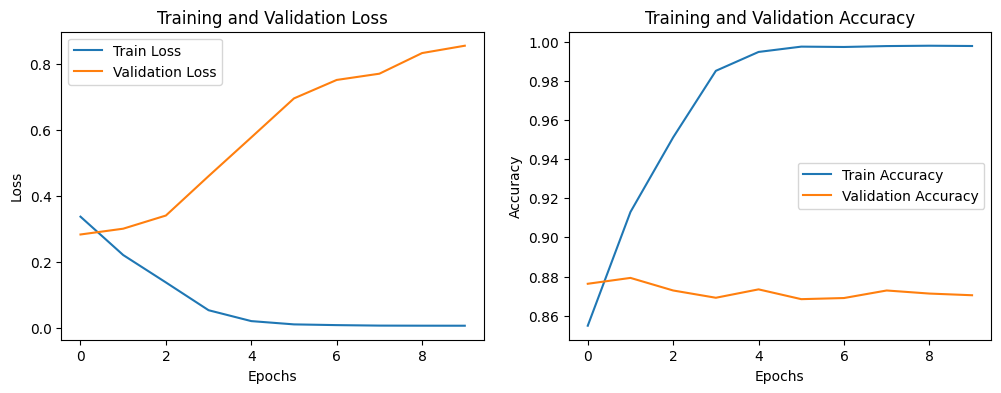

In [30]:
# Plotting training and validation loss

plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# Insights and reports

*Performance*:

The model achieved a test accuracy of 87.05%.
Validation accuracy closely follows training accuracy, indicating no major overfitting.

*Challenges*:

1. Cleaning text data while maintaining meaningful words.
2. Balancing between removing noise (stopwords) and keeping important words.
3. Choosing the optimal number of TF-IDF features.

*Potential Improvements*:

1. Use a recurrent neural network (LSTM/GRU) for better sequential text understanding.
2. Use pre-trained embeddings like Word2Vec or GloVe instead of TF-IDF for better feature extraction.
3. Hyperparameter tuning such as using more neurons or different optimizers.

# Conclusion 

In this project, I successfully built and trained a neural network to classify IMDb movie reviews into positive or negative sentiments. I achieved a test accuracy of 87.05%, demonstrating that the model effectively generalizes to unseen data.